***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
# Verificando resumo dos dados
dados.Renda.describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renda, dtype: float64

In [6]:
# Identificando os valores mínimos e máximos
valor_min = dados.Renda.min()
valor_max = dados.Renda.max()
print(f'Valor mínimo: {valor_min} \n Valor máximo: {valor_max}')

Valor mínimo: 0 
 Valor máximo: 200000


In [7]:
# Armazenando salario mínimo para cálculo de classe
salario_minimo = 788.00

# Criando lista com limite das classes
intervalo_classe = [valor_min, (salario_minimo*2), (salario_minimo*5), (salario_minimo*15), (salario_minimo*25), valor_max]
intervalo_classe

[0, 1576.0, 3940.0, 11820.0, 19700.0, 200000]

### 2º Definir os labels das classes

In [8]:
# Definindo labels para as classes
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [9]:
# Criando um recorte dentro faixas indicadas
classe_faixa_salarial = pd.cut(x = dados.Renda,
       bins = intervalo_classe,
       labels = labels,
       include_lowest = True
       )
classe_faixa_salarial

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [10]:
# Efetuando a contagem de valores por classe
frequencia_salarial = pd.value_counts(classe_faixa_salarial)
frequencia_salarial

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [11]:
# Criando tabela de percentual dos dados de renda
percentual_salarial = round(pd.value_counts(classe_faixa_salarial, normalize = True) * 100, 2)
percentual_salarial

E    64.75
D    24.21
C     9.42
B     1.07
A     0.55
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [12]:
# Criando df e ordenando indíces por labels
dist_freq_classe_salarial = pd.DataFrame({'Frequência': frequencia_salarial, 'Porcentagem (%)': percentual_salarial}) # Unificando series
dist_freq_classe_salarial.rename_axis('Classe', axis= 'columns', inplace = True) # renomeando coluna do índice
dist_freq_classe_salarial.sort_index(ascending = False, inplace = True) # ordenando o df por classe
dist_freq_classe_salarial

Classe,Frequência,Porcentagem (%)
A,420,0.55
B,822,1.07
C,7241,9.42
D,18602,24.21
E,49755,64.75


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: >

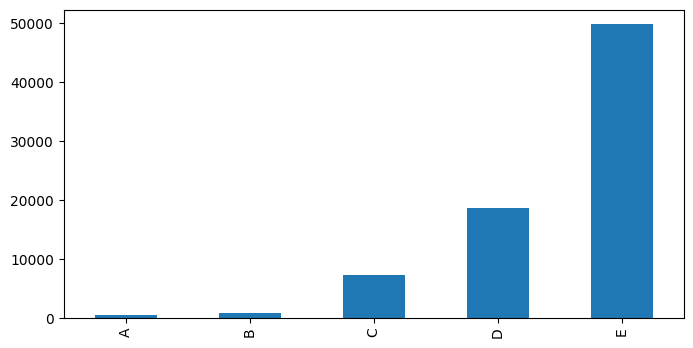

In [13]:
dist_freq_classe_salarial['Frequência'].plot.bar(figsize=(8,4))

> ### Conclusões

* Mais de 60% da população está classe E, recebe no máximo 2 salários mínimos.
* Há uma menor concentração de pessoas na classe A.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Axes: title={'center': 'Distribuição de Frequências - IDADE'}, xlabel='Anos', ylabel='Count'>

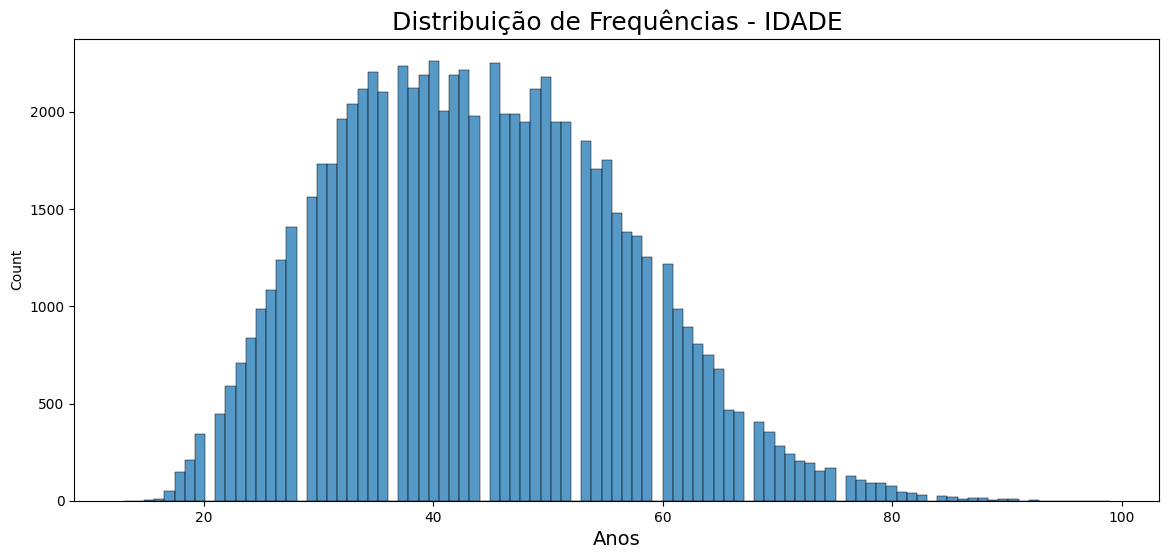

In [44]:
# criando histograma da variável idade
ax = sns.histplot(dados['Idade'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - IDADE', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<Axes: title={'center': 'Distribuição de frequências - Renda'}, xlabel='Reais', ylabel='Count'>

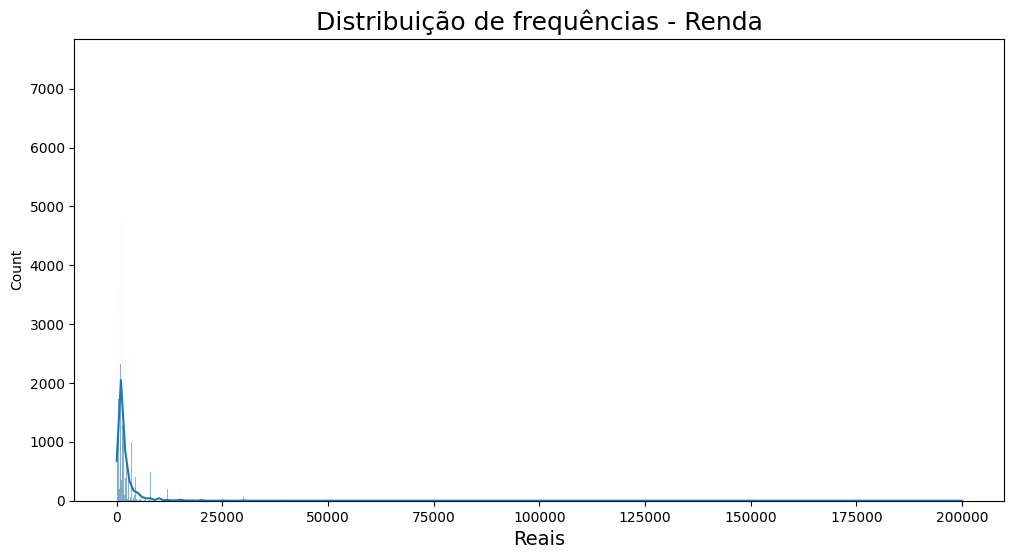

In [14]:
# criando histograma da variável Renda
ax = sns.histplot(dados.Renda, kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências - Renda', fontsize=18)
ax.set_xlabel('Reais', fontsize=14)
ax

Analisando a variável renda, identificamos o seguinte:
* Possui assimetria a direita
* Tal assimetria ocorre devido a concentração de pessoas que possuem salários menores.
* Como a cauda está muito longa, ha indícios de existir outliers.

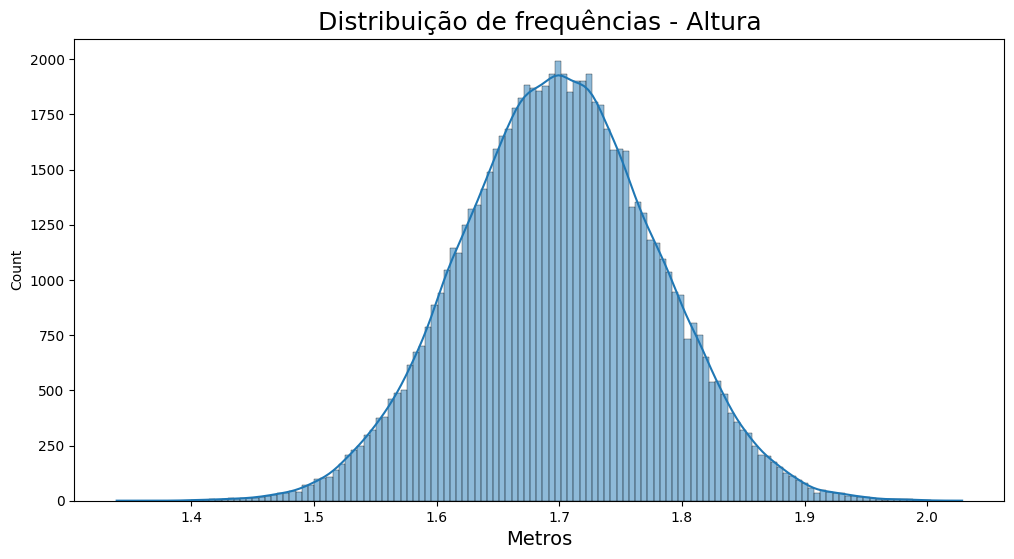

In [15]:
# criando histograma da altura com KDE
ax = sns.histplot(dados.Altura, kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax;

A variável renda, possui os seguintes aspectos:
* Gráfico simétrico
* A maioria dos dados se concentram no meio

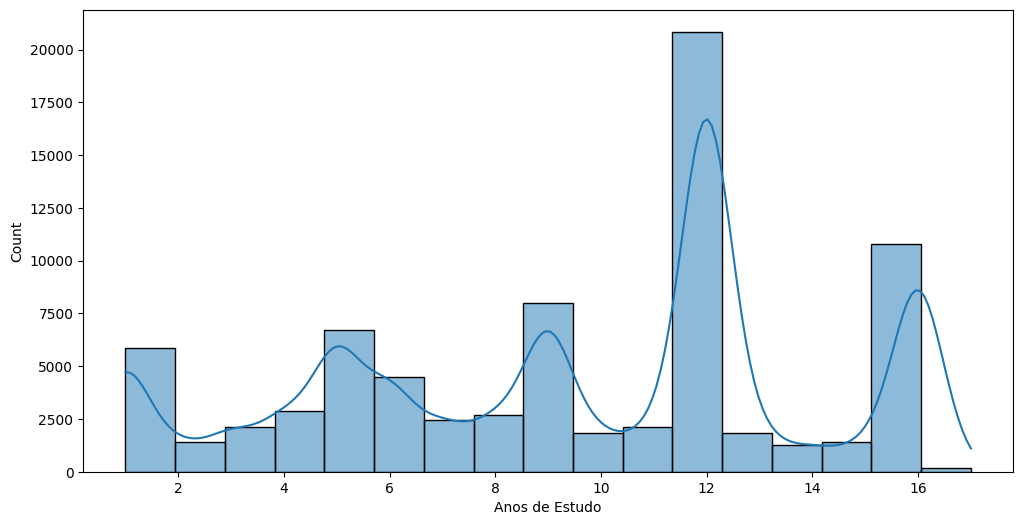

In [16]:
# criando histograma dos anos de estudo
ax = sns.histplot(dados['Anos de Estudo'], bins = 17, kde = True)
ax.figure.set_size_inches(12,6)
ax;

> ### Conclusões

Analisando a variável renda, identificamos o seguinte:
* Possui assimetria a direita
* Tal assimetria ocorre devido a concentração de pessoas que possuem salários menores.
* Como a cauda está muito longa, ha indícios de existir outliers.


A variável renda, possui os seguintes aspectos:

* Gráfico simétrico
* A maioria dos dados se concentram no meio

Analisando a variável "Anos de Estudo", identificamos:
* multimodal, existe um pico em vários anos de estudo
* tem uma leve assimetria para esquerda
* grande parte das pessoas possui mais de 12 anos de estudo.



### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

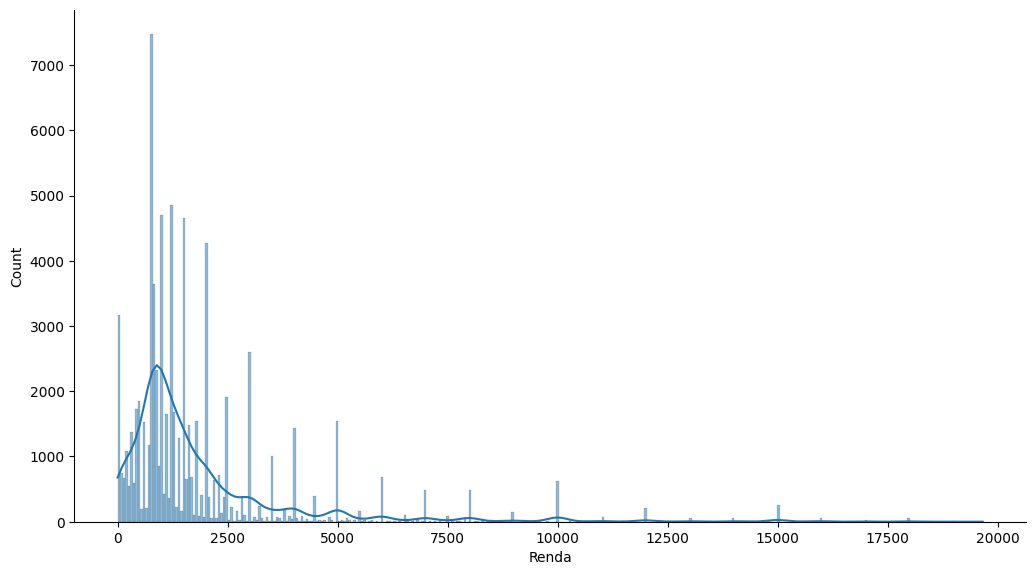

In [17]:
ax = sns.displot(dados.query('Renda < 20000').Renda, kde = True)
ax.figure.set_size_inches(12,6)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [18]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [19]:
# cruzamento de series e alterando de valores numéricos para nomes
frequencia_sexo_cor = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia_sexo_cor.rename(index=sexo, inplace = True)
frequencia_sexo_cor.rename(columns=cor, inplace = True)
frequencia_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [20]:
# Percentual cruzamento de series e alterando de valores numéricos para nomes
percentual_sexo_cor = pd.crosstab(dados.Sexo,
                         dados.Cor, normalize = True) * 100
percentual_sexo_cor.rename(index=sexo, inplace = True)
percentual_sexo_cor.rename(columns=cor, inplace = True)
percentual_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Verificamos que há mais representantes "homens", sendo em sua maioria da cor "parda" e depois "branca".

Quanto às "mulheres" segue o mesmo padrão dos homens, predomina a cor "parda" e depois "branca".

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [21]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [22]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [23]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [24]:
dados.Renda.mad()

<ipython-input-24-9b3374082fa9>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dados.Renda.mad()


1526.4951371638058

### Obtenha a variância

In [25]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [26]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [27]:
media_renda_por_sexo_cor = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
media_renda_por_sexo_cor.rename(index=sexo, inplace = True)
media_renda_por_sexo_cor.rename(columns=cor, inplace = True)
media_renda_por_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [28]:
mediana_renda_por_sexo_cor = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'median',
                         values = dados.Renda)
mediana_renda_por_sexo_cor.rename(index=sexo, inplace = True)
mediana_renda_por_sexo_cor.rename(columns=cor, inplace = True)
mediana_renda_por_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,797.5,1700.0,1200.0,2800.0,1200.0
Feminino,788.0,1200.0,800.0,1500.0,800.0


In [29]:
max_renda_por_sexo_cor = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'max',
                         values = dados.Renda)
max_renda_por_sexo_cor.rename(index=sexo, inplace = True)
max_renda_por_sexo_cor.rename(columns=cor, inplace = True)
max_renda_por_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

Calculando a média identificamos que as pessoas de raça amarela  possuem a maior renda e as pessoas de raça indígena possuem a menor renda.

Ao analisar a mediana confirmamos a observação acima.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [30]:
mad_renda_por_sexo_cor = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mad',
                         values = dados.Renda)
mad_renda_por_sexo_cor.rename(index=sexo, inplace = True)
mad_renda_por_sexo_cor.rename(columns=cor, inplace = True)
mad_renda_por_sexo_cor

<ipython-input-30-1b7ead114a6a>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_renda_por_sexo_cor = pd.crosstab(dados.Sexo,
<ipython-input-30-1b7ead114a6a>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_renda_por_sexo_cor = pd.crosstab(dados.Sexo,
<ipython-input-30-1b7ead114a6a>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_renda_por_sexo_cor = pd.crosstab(dados.Sexo,
<ipython-input-30-1b7ead114a6a>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_renda_por_sexo_cor = pd.crosstab(dados.Sexo,
<ipython-input-30-1b

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,798.910889,2261.012346,975.602482,3709.597211,1125.827704
Feminino,3007.892952,1670.967106,705.453357,2549.146322,811.580946


In [31]:
var_renda_por_sexo_cor = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'var',
                         values = dados.Renda)
var_renda_por_sexo_cor.rename(index=sexo, inplace = True)
var_renda_por_sexo_cor.rename(columns=cor, inplace = True)
var_renda_por_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1.449841e+06,2.257002e+07,3.749294e+06,3.295707e+07,5.345747e+06
Feminino,1.429818e+08,1.056909e+07,1.821960e+06,1.392166e+07,2.547960e+06


In [32]:
std_renda_por_sexo_cor = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'std',
                         values = dados.Renda)
std_renda_por_sexo_cor.rename(index=sexo, inplace = True)
std_renda_por_sexo_cor.rename(columns=cor, inplace = True)
std_renda_por_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1204.093490,4750.791872,1936.309271,5740.82482,2312.087184
Feminino,11957.498292,3251.013154,1349.799809,3731.17366,1596.233048


> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

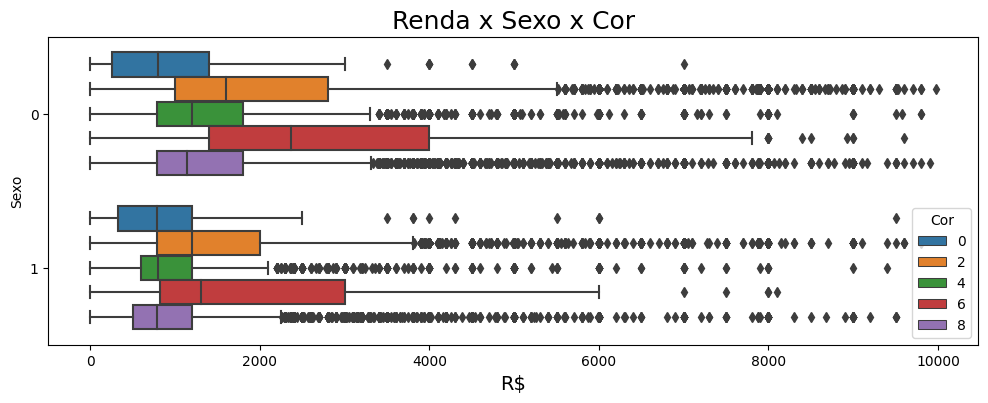

In [47]:
# analisando dados de renda x sexo
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h', hue = dados.Cor) # posição do boxplot -> orient = h
ax.figure.set_size_inches(12,4)
ax.set_title('Renda x Sexo x Cor', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

ax;

> ### Conclusões

Após as análises identificamos que a cor "Amarela" possui um número maior de dispersão dos dados e a cor "Parda" possui um número alto de possíveis outliers.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [34]:
from scipy import stats

stats.percentileofscore(dados.Renda, 788, kind = 'weak')

28.867777199375325

kind -
* 'rank' - default, ele pega todo o valor de referência na lista e tira uma média.
* 'strict' - retorna o percentual abaixo do valor de referência, excluindo o valor de referência.
* 'weak' - retorna o percentual igual e abaixo do valor de referência, incluindo o valor de referência.
* 'mean' - retorna o percentual considerando a metade do valor de referência.

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [37]:
# dados.Renda.quantile([i / 100 for i in range(1,100)][98])
dados.Renda.quantile(.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [42]:
analise_renda_por_sexo_anos_estudo = pd.crosstab(dados['Anos de Estudo'],
                                                 dados.Sexo,
                                                 aggfunc = ['mean', 'median', 'max', 'std'],
                                                 values = dados.Renda).round(2)
analise_renda_por_sexo_anos_estudo.rename(index=anos_de_estudo, inplace = True)
analise_renda_por_sexo_anos_estudo.rename(columns=sexo, inplace = True)
analise_renda_por_sexo_anos_estudo

mean             median           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano    799.49   516.20       700      390   
1 ano                             895.63   492.77       788      400   
2 anos                            931.18   529.91       788      450   
3 anos                           1109.20   546.85       800      500   
4 anos                           1302.33   704.28      1000      788   
5 anos                           1338.65   781.39      1045      788   
6 anos                           1448.88   833.73      1200      788   
7 anos                           1465.50   830.75      1200      788   
8 anos                           1639.40   933.62      1300      800   
9 anos                           1508.04   868.02      1200      788   
10 anos                          1731.27   925.92      1218      800   
11 anos                          2117.06  1286.79      1500     1000   
12 anos                          2470.33  1682.31      1800     1200   
13 anos                          3195.10  1911.73      2400     1300   
14 anos                          3706.62  2226.46      2500     1600   
15 anos ou mais                  6134.28  3899.51      4000     2800   
Não determinados                 1295.76   798.17      1200      788   

                                     max                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     30000    10000   1023.90   639.31  
1 ano                              30000     2000   1331.95   425.29  
2 anos                             40000     4000   1435.17   498.23  
3 anos                             80000     3500   2143.80   424.12  
4 anos                             50000    10000   1419.82   629.55  
5 anos                             35000     8000   1484.65   635.78  
6 anos                             25000     6000   1476.63   574.55  
7 anos                             40000     9000   1419.71   602.04  
8 anos                             30000    18000   1515.58   896.78  
9 anos                             60000    20000   2137.66   973.22  
10 anos                            45000     6000   2078.61   620.61  
11 anos                           200000   100000   2676.54  1819.04  
12 anos                            30000   120000   2268.08  4851.83  
13 anos                            25000    20000   2797.12  2053.79  
14 anos                            50000    20000   3987.21  2064.08  
15 anos ou mais                   200000   100000   7447.61  4212.77  
Não determinados                    7000     3000    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Box-plot da RENDA por SEXO e ANOS DE ESTUDO'}, xlabel='R$', ylabel='Anos de Estudo'>

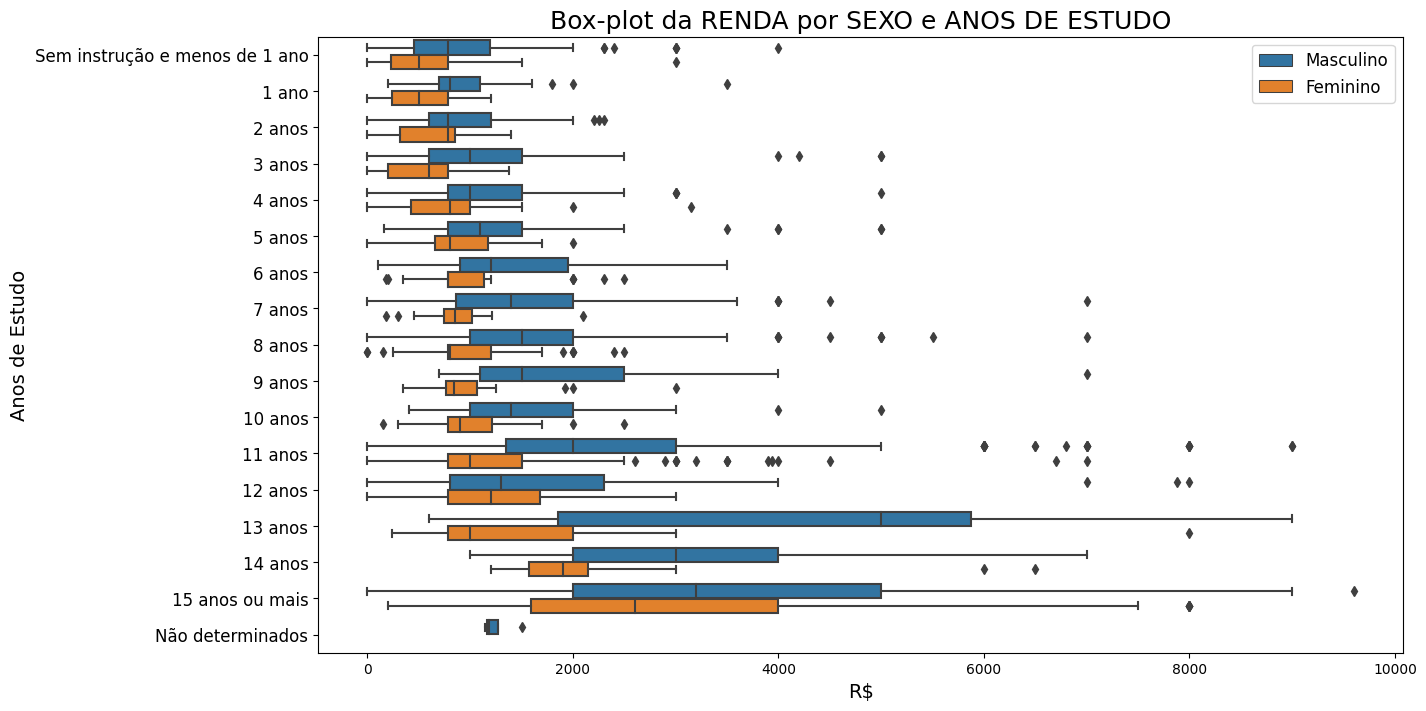

In [48]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=dados.query('Renda < 10000 and Idade == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [49]:
renda_estatisticas_por_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index = uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: title={'center': 'Box-plot da RENDA por ESTADOS'}, xlabel='R$', ylabel='Estados'>

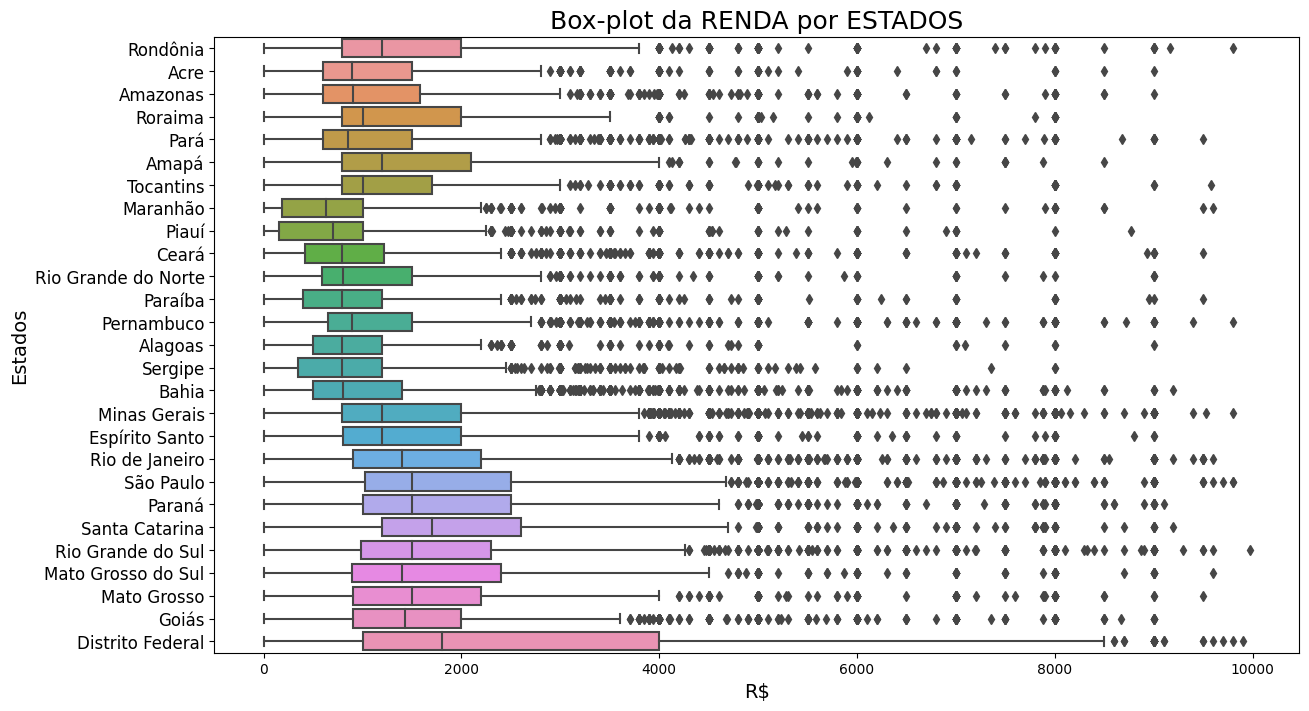

In [50]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax

> ### Conclusões

Escreva suas conclusões aqui...